In [2]:
import numpy as np
#%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
# Load the dataset as (image,label) tuples and split in 80% train and 20% test data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Inspect the dataset

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


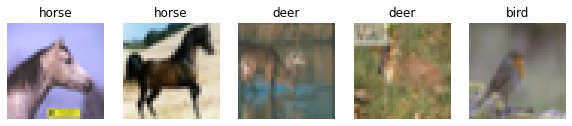

In [5]:
explicit_labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1,5,figsize=(10,15))
for index, sample in enumerate(np.random.choice(train_images.shape[0], 5)):
    ax[index].imshow(train_images[sample])
    ax[index].set_title(explicit_labels[train_labels[sample,0]])
    ax[index].axis("off")

# Preprocess the data

In [6]:
# Set input shape for model
my_input_shape = (train_images.shape[1:])

# Reshape labels into one-dimensional array
train_labels=train_labels.reshape(-1)
test_labels=test_labels.reshape(-1)

# Create training and test dataset form the images and labels
train_dataset_images = tf.data.Dataset.from_tensor_slices(train_images)
train_dataset_targets = tf.data.Dataset.from_tensor_slices(train_labels)
test_dataset_images = tf.data.Dataset.from_tensor_slices(test_images)
test_dataset_targets = tf.data.Dataset.from_tensor_slices(test_labels)

# Zip images and labels
train_dataset = tf.data.Dataset.zip((train_dataset_images, train_dataset_targets))
test_dataset = tf.data.Dataset.zip((test_dataset_images, test_dataset_targets))

# Normalize images and onehot encode the labels
train_dataset = train_dataset.map(lambda img, lbl: (tf.cast(2*(img/255)-1,tf.float32),
                                                    tf.one_hot(lbl, 10)),
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(lambda img, lbl: (tf.cast(2*(img/255)-1,tf.float32),
                                                  tf.one_hot(lbl, 10)),
                                num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Cache the preprocessed datasets
#train_dataset = train_dataset.cache()
#test_dataset = test_dataset.cache()

# Shuffle the data
train_dataset = train_dataset.shuffle(100)
test_dataset = test_dataset.shuffle(100)

# Create minibatches
train_dataset = train_dataset.batch(100)
test_dataset = test_dataset.batch(100)

# Prefetch the datasets
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# Define the model

In [8]:
from tensorflow.keras import Model, regularizers

class Model(Model):    
    def __init__(self):
        super(Model, self).__init__()
        self.conv_1 = tf.keras.layers.Conv2D(
            filters=128,
            kernel_size=7,
            padding='same',
            activation=None,
            kernel_regularizer=regularizers.l2(0.01),
            input_shape=my_input_shape)
        
        self.max_pool_1 = tf.keras.layers.MaxPool2D()
        
        self.batchNorm_1 = tf.keras.layers.BatchNormalization()

        self.dropout_1 = tf.keras.layers.Dropout(0.3)

        self.conv_2 = tf.keras.layers.Conv2D(
            filters=256,
            kernel_size=5,
            padding='same',
            activation=None,
            kernel_regularizer=regularizers.l2(0.01)
            )
        
        self.max_pool_2 = tf.keras.layers.MaxPool2D()
        
        self.batchNorm_2 = tf.keras.layers.BatchNormalization()

        self.dropout_2 = tf.keras.layers.Dropout(0.3)

        self.conv_3 = tf.keras.layers.Conv2D(
            filters=512,
            kernel_size=3,
            padding='same',
            activation=None,
            kernel_regularizer=regularizers.l2(0.01)
            )
        
        self.batchNorm_3 = tf.keras.layers.BatchNormalization()    

        self.dropout_3 = tf.keras.layers.Dropout(0.3)   

        self.conv_4 = tf.keras.layers.Conv2D(
            filters=512,
            kernel_size=3,
            padding='same',
            activation=None,
            kernel_regularizer=regularizers.l2(0.01)
            )
        
        self.max_pool_4 = tf.keras.layers.MaxPool2D()
        
        self.batchNorm_4 = tf.keras.layers.BatchNormalization()

        self.dropout_4 = tf.keras.layers.Dropout(0.3)
        
        self.conv_5 = tf.keras.layers.Conv2D(
            filters=1024,
            kernel_size=3,
            padding='same',
            activation=None,
            kernel_regularizer=regularizers.l2(0.01)
            )
        
        self.batchNorm_5 = tf.keras.layers.BatchNormalization()

        self.dropout_5 = tf.keras.layers.Dropout(0.3)

        self.conv_6 = tf.keras.layers.Conv2D(
            filters=1024,
            kernel_size=2,
            activation=None,
            kernel_regularizer=regularizers.l2(0.01)
            )

        self.max_pool_6 = tf.keras.layers.MaxPool2D()

        self.batchNorm_6 = tf.keras.layers.BatchNormalization()

        self.dropout_6 = tf.keras.layers.Dropout(0.3)

        self.global_average_pooling_layer = tf.keras.layers.GlobalAvgPool2D()

        self.output_layer = tf.keras.layers.Dense(
            units=10,
            activation='softmax')

    def call(self, x, training = True):
        x = self.conv_1(x)

        x = self.max_pool_1(x) 

        x = self.batchNorm_1(x, training)
        x = tf.keras.activations.relu(x)
        x = self.dropout_1(x, training)

        x = self.conv_2(x)

        x = self.max_pool_2(x)        

        x = self.batchNorm_2(x, training)
        x = tf.keras.activations.relu(x)
        x = self.dropout_2(x, training)

        x = self.conv_3(x)

        x = self.batchNorm_3(x, training)
        x = tf.keras.activations.relu(x)
        x = self.dropout_3(x, training)

        x = self.conv_4(x)

        x = self.max_pool_4(x)

        x = self.batchNorm_4(x, training)
        x = tf.keras.activations.relu(x)
        x = self.dropout_4(x, training)

        x = self.conv_5(x)

        x = self.batchNorm_5(x, training)
        x = tf.keras.activations.relu(x)
        x = self.dropout_5(x, training)

        x = self.conv_6(x)

        x = self.max_pool_6(x)

        x = self.batchNorm_6(x, training)
        x = tf.keras.activations.relu(x)
        x = self.dropout_6(x, training)
        x = self.global_average_pooling_layer(x)
        x = self.output_layer(x)
        return x
        tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

# Initialize Model and hyperparameters
### Define training and testing

In [ ]:
tf.keras.backend.clear_session()

### Hyperparameters
learning_rate = 0.0001
running_average_factor = 0.95

# Initialize model
model = Model()

# Initialize the loss
loss_function = tf.keras.losses.CategoricalCrossentropy()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate)


@tf.function
def train_step(input, target):
    with tf.GradientTape() as tape:
        prediction = model(input, training=True)
        loss = loss_function(target, prediction) + tf.reduce_sum(model.losses)        
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(target, axis=1), tf.argmax(prediction, axis=1)),tf.float32))
    return loss, accuracy

@tf.function
def performance_calc(input, target):
    prediction = model(input, training=False)
    loss = loss_function(target, prediction) + tf.reduce_sum(model.losses)
    accuracy =  tf.reduce_mean(tf.cast(tf.equal(tf.argmax(target, axis=1), tf.argmax(prediction, axis=1)),tf.float32))
    return loss, accuracy

def test(test_data):
    # Test over complete test data
    test_accuracy_aggregator = []
    test_loss_aggregator = []

    for (input, target) in test_data:
        loss, accuracy = performance_calc(input, target)
        test_loss_aggregator.append(loss.numpy())
        test_accuracy_aggregator.append(accuracy.numpy())

    test_loss = np.mean(test_loss_aggregator)
    test_accuracy = np.mean(test_accuracy_aggregator)

    return test_loss, test_accuracy

# Train the model

In [13]:
%%time
%matplotlib inline

from IPython.display import clear_output

# Set number of epochs
num_epochs = 30

# Initialize lists for later visualization.
train_losses = []
train_accuracies = []

test_losses = []
test_accuracies = []

# Testing model performance on train and test data before learning
train_loss, train_accuracy = test(model, train_dataset, loss_function)
train_losses.append(train_loss)
train_accuracies.append(train_accuracy)

test_loss, test_accuracy = test(model, test_dataset, loss_function)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

# Display loss and accuracy before training
print('Starting loss and accuracy:')
print('Train loss: ',train_loss)
print('Test loss: ',test_loss)
print('Train accuracy: ',train_accuracy)
print('Test accuracy: ',test_accuracy)

# Train loop for num_epochs epochs.
for epoch in range(num_epochs):
    train_dataset = train_dataset.shuffle(buffer_size=64)
    test_dataset = test_dataset.shuffle(buffer_size=64)

    # Training
    running_average_loss = 0
    running_average_accuracy = 0
    for (input,target) in train_dataset:
        train_loss, train_accuracy = train_step(model, input, target, loss_function, optimizer)
        running_average_loss = running_average_factor * running_average_loss  + (1 - running_average_factor) * train_loss
        running_average_accuracy = running_average_factor * running_average_accuracy  + (1 - running_average_factor) * train_accuracy
        
    train_losses.append(running_average_loss.numpy())
    train_accuracies.append(running_average_accuracy.numpy())

    # Testing
    test_loss, test_accuracy = test(model, test_dataset, loss_function)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    #Dynamically plot current accuracy and loss
    clear_output(wait=True) 
    fontsize=24
    fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,10))
    ax[0].set_xlim((0,num_epochs))
    ax[0].plot(train_losses,label="Training")
    ax[0].plot(test_losses,label="Test")

    ax[1].set_ylim((0,1))
    ax[1].plot(train_accuracies,label="Training")
    ax[1].plot(test_accuracies,label="Test")

    ax[0].set_ylabel("Loss",fontsize=fontsize)
    ax[1].set_ylabel("Accuracy",fontsize=fontsize)
    ax[1].set_xlabel("Epochs",fontsize=fontsize)
    ax[1].axhline(0.85,xmax=num_epochs,c='g',ls='--')
    ax[0].legend()
    ax[1].legend()
    plt.show()

    # Display loss and accuracy for current epoch    
    print('Epoch: __ ' + str(epoch))
    print('Train loss: ',running_average_loss.numpy())
    print('Test loss: ',test_loss)
    print('Train accuracy: ',running_average_accuracy.numpy())
    print('Test accuracy: ',test_accuracy)

ValueError: in user code:

    <ipython-input-9-5a367bd5ea31>:13 performance_calc  *
        prediction = model(input, training=False)
    <ipython-input-8-cd7f594094d6>:92 call  *
        x = self.conv_1(x)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:982 __call__  **
        self._maybe_build(inputs)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:2643 _maybe_build
        self.build(input_shapes)  # pylint:disable=not-callable
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\keras\layers\convolutional.py:204 build
        dtype=self.dtype)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:614 add_weight
        caching_device=caching_device)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\training\tracking\base.py:750 _add_variable_with_custom_getter
        **kwargs_for_getter)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py:145 make_variable
        shape=variable_shape if variable_shape else None)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\ops\variables.py:260 __call__
        return cls._variable_v1_call(*args, **kwargs)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\ops\variables.py:221 _variable_v1_call
        shape=shape)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\ops\variables.py:67 getter
        return captured_getter(captured_previous, **kwargs)
    c:\users\marcel\programme\miniconda3\envs\iannwtf\lib\site-packages\tensorflow\python\eager\def_function.py:702 invalid_creator_scope
        "tf.function-decorated function tried to create "

    ValueError: tf.function-decorated function tried to create variables on non-first call.


# Plotting accuracy and loss for training and test data.

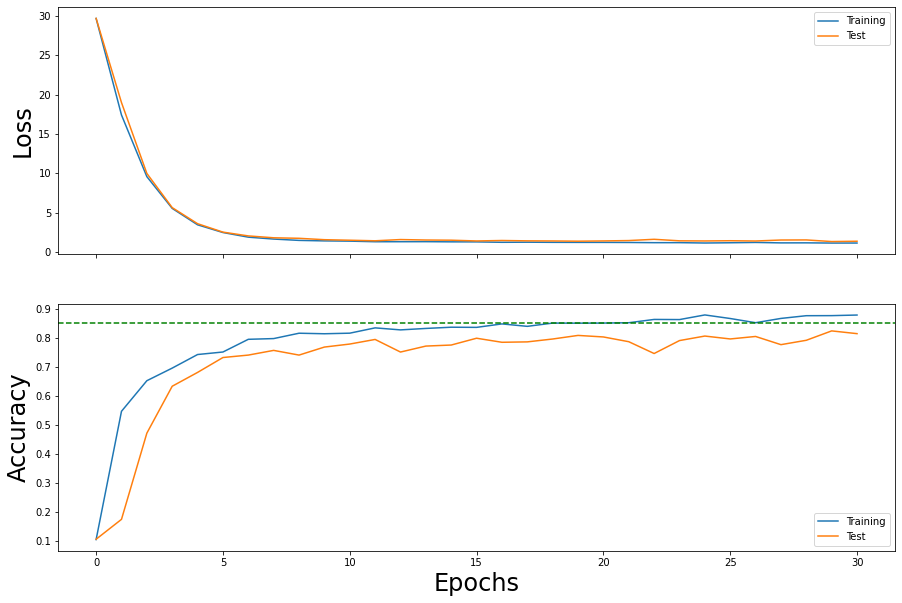

In [ ]:
fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,10))
ax[0].plot(train_losses,label="Training")
ax[0].plot(test_losses,label="Test")

ax[1].plot(train_accuracies,label="Training")
ax[1].plot(test_accuracies,label="Test")

fontsize=24
ax[0].set_ylabel("Loss",fontsize=fontsize)
ax[1].set_ylabel("Accuracy",fontsize=fontsize)
ax[1].set_xlabel("Epochs",fontsize=fontsize)
ax[1].axhline(0.85,xmax=num_epochs,c='g',ls='--')
ax[0].legend()
ax[1].legend()
plt.show()